<a href="https://colab.research.google.com/github/joaochenriques/MCTE_2022/blob/main/Tides/StandingWaves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pathlib
if not pathlib.Path("mpl_utils.py").exists():
  !curl -O https://raw.githubusercontent.com/joaochenriques/MCTE_2022/main/libs/mpl_utils.py

In [ ]:
import matplotlib.pyplot as mpl
import numpy as np
import mpl_utils as mut
mut.config_plot()

%config InlineBackend.figure_formats = ['svg']

Velocity field

In [ ]:
def velocity( t, y, x, A, k, ω, λ, h ):
    g  = 9.81
    
    aa = A * g * k / ω

    ax = aa * np.cosh( k*(y+h) ) / np.cosh( k*h )
    ay = aa * np.sinh( k*(y+h) ) / np.cosh( k*h )

    ux1 = ax * np.cos( +k*x - ω*t )
    uy1 = ay * np.sin( +k*x - ω*t )
    
    ux2 = ax * np.cos( -k*x - ω*t )
    uy2 = ay * np.sin( -k*x - ω*t )

    return ( ux1 - ux2, uy1 + uy2) 

Wave height for a standing wave

In [ ]:
def ζ( t, x, A, k, ω ):
    return 2.0 * A * np.cos( k*x ) * np.cos( ω*t )

Configure the test case

In [ ]:
π = np.pi
g = 9.81

A = 0.05
h = 0.50
L = 20.0

λ = L
k = 2 * π / λ
ω = np.sqrt( g * k * np.tanh(k*h) )
T = 2 * π / ω

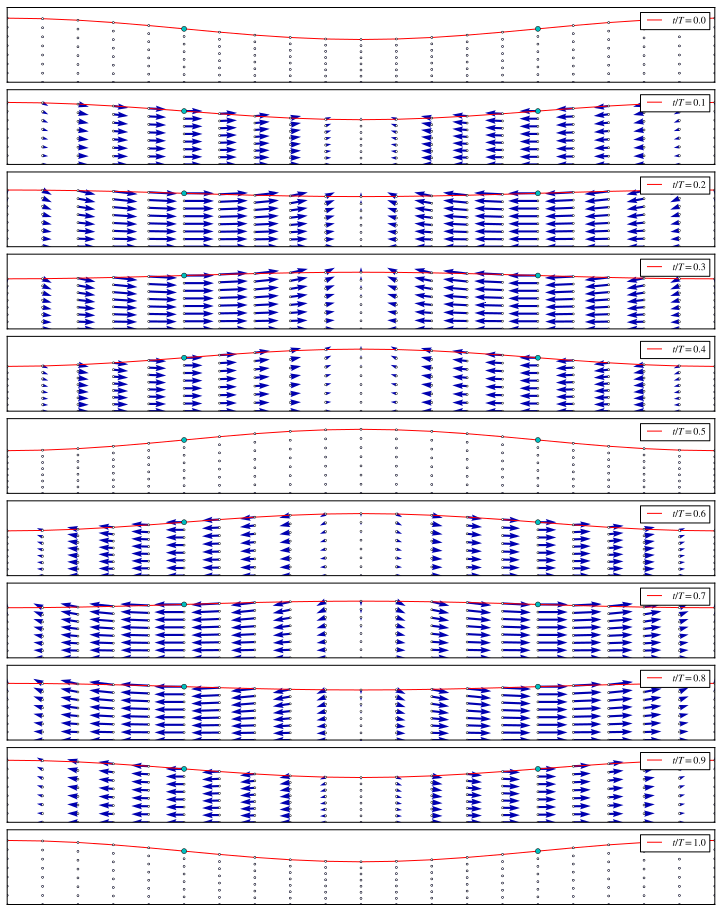

In [16]:
t_space = np.linspace( 0, T, 11 )
x_space = np.linspace( 0, L, 21 )

rows = len(t_space)

mpl.rcParams["figure.figsize"] = (12,1.4*rows)

fig, axs =mpl.subplots( rows, 1 )
fig.subplots_adjust(hspace=0.1)

s_space = np.linspace( 0.0, 1.0, 8 )

for i, t in enumerate( t_space ):
    axs[i].plot( x_space, ζ( t, x_space, A, k, ω ), 'r-', label = '$t/T=%.1f$'%(t/T) )

    for s in s_space:
        y = ζ( t, x_space, A, k, ω )    
        ys_space = y*s - h*(1-s)
        axs[i].plot( x_space, ys_space, 'ro', markersize=2, markerfacecolor='w' )
        ux, uy = velocity( t, ys_space, x_space, A, k, ω, λ, h )

        axs[i].quiver( x_space, ys_space, ux, uy, color='#0000B0', width=0.003, scale=10, zorder=-2)

    axs[i].plot( (L*0.25,L*0.75), (0,0), 'co' )
    axs[i].set_ylim( (-h,4*A) )
    axs[i].xaxis.set_visible(False)
    axs[i].yaxis.set_visible(False)
    axs[i].legend(fontsize=10)

fig.savefig( 'StandingWave.pdf', bbox_inches='tight' )